<a href="https://colab.research.google.com/github/diegour1/Estructuras/blob/master/Gale_ShapleyAlgorithm_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 Advanced Algorithms

Name: Diego Useche Reyes 
email: diusecher@unal.edu.co

Name: Sneyder Gantiva
email: esgantivar@unal.edu.co

### Gale - Shapley Algorithm

The code for the Gale - Shapley Algorithm was taken from 
https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2


Libraries Used 

In [0]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import random
import matplotlib.pyplot as plt

Initialize the men and women

In [0]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
women_df.index = man_list

man_df = pd.DataFrame({'A': [1,1,2,4], 'B': [2,4,1,2], 'C':[3,3,3,3], 'D':[4,2,4,1]})
man_df.index = man_list

print(man_df)
print(women_df)

   A  B  C  D
a  1  2  3  4
b  1  4  3  2
c  2  1  3  4
d  4  2  3  1
   A  B  C  D
a  3  3  2  3
b  4  1  3  2
c  2  4  4  1
d  1  2  1  4


Run the Algorithm

In [0]:
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0

# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1

In [0]:
proposals

{('a', 'C'): (3, 2),
 ('b', 'D'): (2, 2),
 ('c', 'A'): (2, 2),
 ('d', 'B'): (2, 2)}

In [0]:
count

6

###Create the matching algorithm function

In [0]:
def matching_alg(man_df, women_df, man_list, women_list):
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0

  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1

  return proposals, count


###Initialize the values:


*   man_list : List of men [m1, m2, ..., mn]
*   woman_list: list of women [w1, w2, ... wn]
*   man_df: men pandas data frame of preferences 'm1': [3,4,2, ...], 'm2': [3,1, 2, ...], .. mn:[4, 3, 5, ...]
*   women_df: women pandas data frame of preferences  'w1': [4,2,6 ...], 'w2': [1, 2, 7 ...], .. wn:[4, 8, 5, ...]


In [0]:
# number of men or women
n = 4

def initialization(n):

  """
  parameters
  n: number of man or women
  return
  man_list: list of n men
  women_list: list of n women
  man_df: dataframe of random preferences of men
  women_df: dataframe of random preferences of women
  """

  # men list
  man_list = []
  for i in range(n):
    man_list.append('M{}'.format(i+1))

  # women list
  women_list = []
  for i in range(n):
    women_list.append('W{}'.format(i+1))

  # create a matrix with random men and women preferences
  M = np.zeros((n,n))
  m_i = np.arange(1,n+1)
  for i in range(n):
    np.random.shuffle(m_i)
    M[i,:] = m_i

  W = np.zeros((n,n))
  w_i = np.arange(1,n+1)
  for i in range(n):
    np.random.shuffle(w_i)
    W[:,i] = w_i

  # add the values of the men and women preferences in a women_df and man_df dataframe of preferences

  women_df = pd.DataFrame()
  for i in range(n):
    women_df['W{}'.format(i+1)] = W[:,i].astype(int)
  women_df.index = man_list

  man_df = pd.DataFrame()
  for i in range(n):
    man_df['W{}'.format(i+1)] = M[:,i].astype(int)
  man_df.index = man_list

  return man_df, women_df, man_list, women_list

# Problem 1

Find the best and worst cases for the Gale-Shapley and Irving Algorithm for n = 4 , n = 40.

For n = 4 the code shows that the best case happens when all the men have different first choice so they all choose the first choice in the first iteration.

The worst case for n = 4 is 9 iterations as shown in the code trying with 1000 possible random configurations. 

In [0]:
# We create a function of the best case of the algorithm with iter number of iterations
def best_case(n, iter):
  count_best = 10000
  for i in range(iter):
    man_df, women_df, man_list, women_list = initialization(n)
    proposals, count = matching_alg(man_df, women_df, man_list, women_list)
    if count < count_best:
      count_best = count
      proposals_best = proposals
      man_df_best, women_df_best = man_df, women_df

  return proposals_best, count_best, man_df_best, women_df_best

In [0]:
# number of iter
iter = 60
# number of men or women
n = 4

proposals_best, count_best, man_df_best, women_df_best = best_case(n, iter)

print(proposals_best)
print('Number of iterations {}'.format(count_best))

{('M1', 'W3'): (1, 2), ('M2', 'W1'): (1, 4), ('M3', 'W4'): (1, 2), ('M4', 'W2'): (1, 3)}
Number of iterations 1


In [0]:
man_df_best

,W1,W2,W3,W4
M1,2,3,1,4
M2,1,3,4,2
M3,3,2,4,1
M4,2,1,4,3


In [0]:
women_df_best

,W1,W2,W3,W4
M1,3,1,2,3
M2,4,2,4,1
M3,2,4,1,2
M4,1,3,3,4


In [0]:
# We create a function of the worst case of the algorithm with iter number of iterations
def worst_case(n, iter):
  count_worst = - 1
  for i in range(iter):
    man_df, women_df, man_list, women_list = initialization(n)
    proposals, count = matching_alg(man_df, women_df, man_list, women_list)
    if count > count_worst:
      count_worst = count
      proposals_worst = proposals
      man_df_worst, women_df_worst = man_df, women_df

  return proposals_worst, count_worst, man_df_worst, women_df_worst

In [0]:
# number of iter
iter = 1000
# number of men or women
n = 4

proposals_worst, count_worst, man_df_worst, women_df_worst = worst_case(n, iter)

print(proposals_worst)
print('Number of iterations {}'.format(count_worst))

{('M1', 'W2'): (3, 1), ('M3', 'W3'): (3, 1), ('M2', 'W1'): (2, 1), ('M4', 'W4'): (4, 1)}
Number of iterations 9


In [0]:
man_df_worst

,W1,W2,W3,W4
M1,1,3,2,4
M2,2,3,1,4
M3,2,1,3,4
M4,2,1,3,4


In [0]:
women_df_worst

,W1,W2,W3,W4
M1,3,1,4,2
M2,1,4,2,4
M3,4,2,1,3
M4,2,3,3,1


Now we look the best and worst case for n = 40.

The best case for n = 40 is that all men have different first choice which gives 1 iteration

In [0]:
# create the initialization so that all men have different first choice of women

def initialization_best(n):

  """
  parameters
  n: number of man or women
  return
  man_list: list of n men
  women_list: list of n women
  man_df: dataframe of random preferences of men
  women_df: dataframe of random preferences of women
  """

  # men list
  man_list = []
  for i in range(n):
    man_list.append('M{}'.format(i+1))

  # women list
  women_list = []
  for i in range(n):
    women_list.append('W{}'.format(i+1))

  # create a matrix with random men and women preferences
  M = np.zeros((n,n))
  m_i = np.arange(1,n+1)
  for i in range(n):
    np.random.shuffle(m_i)
    M[i,:] = m_i

  # Pivot the values so that all men have different first choice for women
  for i in range(n):
    m_i = M[i,:]
    j = np.where(m_i == 1)
    M[i, j] = M[i, i]
    M[i, i] = 1

  W = np.zeros((n,n))
  w_i = np.arange(1,n+1)
  for i in range(n):
    np.random.shuffle(w_i)
    W[:,i] = w_i

  # add the values of the men and women preferences in a women_df and man_df dataframe of preferences

  women_df = pd.DataFrame()
  for i in range(n):
    women_df['W{}'.format(i+1)] = W[:,i].astype(int)
  women_df.index = man_list

  man_df = pd.DataFrame()
  for i in range(n):
    man_df['W{}'.format(i+1)] = M[:,i].astype(int)
  man_df.index = man_list

  return man_df, women_df, man_list, women_list

In [0]:
# n number of men or women
n = 40

# Initialize randomly and the change the first choice of men to be all different women
# Initialize all women with random preferences

man_df, women_df, man_list, women_list = initialization_best(n)

proposals, count = matching_alg(man_df, women_df, man_list, women_list)

print(proposals)
print('Number of iterations best case {}'.format(count))

{('M1', 'W1'): (1, 37), ('M2', 'W2'): (1, 9), ('M3', 'W3'): (1, 2), ('M4', 'W4'): (1, 15), ('M5', 'W5'): (1, 10), ('M6', 'W6'): (1, 37), ('M7', 'W7'): (1, 32), ('M8', 'W8'): (1, 7), ('M9', 'W9'): (1, 25), ('M10', 'W10'): (1, 8), ('M11', 'W11'): (1, 14), ('M12', 'W12'): (1, 35), ('M13', 'W13'): (1, 31), ('M14', 'W14'): (1, 27), ('M15', 'W15'): (1, 29), ('M16', 'W16'): (1, 33), ('M17', 'W17'): (1, 39), ('M18', 'W18'): (1, 13), ('M19', 'W19'): (1, 21), ('M20', 'W20'): (1, 30), ('M21', 'W21'): (1, 37), ('M22', 'W22'): (1, 2), ('M23', 'W23'): (1, 35), ('M24', 'W24'): (1, 36), ('M25', 'W25'): (1, 10), ('M26', 'W26'): (1, 8), ('M27', 'W27'): (1, 13), ('M28', 'W28'): (1, 16), ('M29', 'W29'): (1, 23), ('M30', 'W30'): (1, 36), ('M31', 'W31'): (1, 24), ('M32', 'W32'): (1, 12), ('M33', 'W33'): (1, 38), ('M34', 'W34'): (1, 8), ('M35', 'W35'): (1, 38), ('M36', 'W36'): (1, 1), ('M37', 'W37'): (1, 27), ('M38', 'W38'): (1, 12), ('M39', 'W39'): (1, 26), ('M40', 'W40'): (1, 32)}
Number of iterations best

In [0]:
man_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40
M1,1,9,27,26,40,14,18,6,20,5,10,34,17,8,31,12,32,21,37,39,11,4,38,25,22,24,2,33,3,30,28,13,19,23,35,16,15,29,7,36
M2,33,1,25,17,23,18,20,4,6,2,7,11,12,14,16,10,36,37,40,8,32,34,9,38,39,22,30,24,13,3,28,29,27,31,35,15,21,5,19,26
M3,24,10,1,15,28,39,4,33,40,11,7,22,21,31,8,9,37,26,12,5,27,14,34,3,23,19,38,29,30,25,18,6,16,17,13,35,36,32,20,2
M4,22,39,33,1,13,18,19,30,26,40,37,9,32,2,5,3,25,4,7,21,27,16,38,12,15,35,10,36,11,24,20,6,17,8,14,23,29,31,28,34
M5,19,29,26,33,1,9,4,27,28,14,31,8,38,20,17,32,11,22,3,30,7,39,2,40,35,13,12,15,21,10,18,37,25,36,16,6,34,24,5,23
M6,40,37,5,22,20,1,39,30,24,26,3,25,11,34,21,8,13,9,4,36,2,10,32,23,27,18,16,35,6,19,15,33,29,38,31,14,28,12,17,7
M7,30,9,34,19,27,38,1,5,7,6,40,23,22,13,18,10,16,15,25,3,35,39,2,14,20,11,17,8,37,4,21,36,31,24,12,26,29,28,32,33
M8,36,14,37,34,15,23,28,1,35,38,10,5,40,16,18,31,27,39,11,21,2,13,32,12,22,7,3,24,9,26,30,6,19,29,33,4,17,8,20,25
M9,21,35,13,19,11,36,22,17,1,38,29,31,14,27,24,26,9,12,4,39,15,33,37,40,34,8,16,10,6,25,28,30,20,23,2,5,3,32,18,7
M10,26,11,40,12,30,18,6,39,28,1,8,20,2,38,27,19,32,22,14,33,23,21,4,7,5,15,9,31,25,10,17,37,24,16,29,13,3,36,34,35


Now we look for the worst case for n = 40 , using 5000 times, which gives roughly 252 iterations.

In [29]:
# number of iter
iter = 5000
# number of men or women
n = 40

proposals_worst, count_worst, man_df_worst, women_df_worst = worst_case(n, iter)

print(proposals_worst)
print('Number of iterations {}'.format(count_worst))

{('M2', 'W5'): (1, 10), ('M17', 'W15'): (1, 1), ('M21', 'W25'): (1, 1), ('M27', 'W34'): (1, 1), ('M29', 'W40'): (1, 3), ('M39', 'W32'): (1, 3), ('M4', 'W27'): (5, 4), ('M15', 'W2'): (3, 1), ('M18', 'W10'): (13, 5), ('M1', 'W9'): (6, 15), ('M25', 'W14'): (4, 6), ('M28', 'W37'): (2, 2), ('M11', 'W11'): (4, 4), ('M19', 'W39'): (21, 2), ('M14', 'W7'): (4, 6), ('M13', 'W12'): (7, 2), ('M22', 'W23'): (3, 3), ('M9', 'W8'): (6, 2), ('M31', 'W28'): (5, 4), ('M20', 'W18'): (14, 1), ('M26', 'W19'): (10, 4), ('M8', 'W24'): (13, 3), ('M6', 'W6'): (5, 2), ('M37', 'W35'): (13, 2), ('M32', 'W17'): (9, 13), ('M12', 'W1'): (9, 4), ('M10', 'W13'): (23, 7), ('M30', 'W33'): (24, 4), ('M23', 'W36'): (7, 1), ('M5', 'W21'): (5, 6), ('M16', 'W38'): (19, 1), ('M7', 'W29'): (15, 3), ('M33', 'W16'): (14, 2), ('M40', 'W31'): (24, 20), ('M36', 'W22'): (7, 5), ('M34', 'W4'): (19, 1), ('M38', 'W30'): (3, 2), ('M3', 'W26'): (5, 3), ('M35', 'W20'): (5, 1), ('M24', 'W3'): (14, 23)}
Number of iterations 252


In [30]:
man_df_worst

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40
M1,11,25,16,21,18,34,22,24,6,4,37,2,3,12,13,32,10,29,20,19,30,17,31,23,26,36,33,27,9,8,7,39,35,5,40,14,15,1,28,38
M2,2,24,33,25,1,26,37,21,20,34,5,22,35,10,23,6,15,7,19,36,8,9,12,17,18,39,31,40,4,13,30,16,27,3,14,38,28,32,11,29
M3,36,25,12,27,28,21,40,7,34,23,39,2,14,20,31,9,24,1,22,38,19,18,11,33,8,5,29,37,16,3,6,26,35,15,4,10,17,13,32,30
M4,36,24,40,9,1,19,11,28,38,30,8,13,17,10,35,27,6,32,37,15,18,21,14,20,2,4,5,34,29,26,12,31,7,25,22,23,33,16,3,39
M5,18,1,6,19,35,12,32,23,33,7,40,39,15,8,13,24,17,9,30,21,5,11,16,14,29,37,10,2,27,28,38,20,25,31,36,3,34,4,26,22
M6,27,32,10,9,1,5,25,35,30,15,7,34,17,39,4,21,2,29,11,22,20,37,8,14,26,31,12,6,33,13,24,28,16,19,3,38,23,36,40,18
M7,4,30,21,35,34,33,3,12,16,40,17,27,2,39,20,25,14,32,22,26,19,28,18,8,9,24,23,38,15,31,7,5,37,36,1,6,11,10,29,13
M8,17,40,31,3,22,4,23,21,28,7,25,30,18,37,19,39,14,8,9,24,1,20,32,13,26,5,15,11,16,33,34,2,27,35,29,38,12,6,10,36
M9,14,20,17,19,8,4,39,6,40,13,34,38,29,18,33,9,5,28,3,22,21,32,2,10,24,35,16,30,11,23,7,15,36,37,12,26,25,1,31,27
M10,4,12,38,15,36,33,8,18,21,17,3,14,23,1,24,10,16,9,6,11,35,5,25,26,28,40,30,29,32,34,37,7,2,22,20,13,31,19,39,27


# Problem 2

Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [0]:
# we create a function which creates the stats and the list of 100 iterations

def matching_stat(n):
  iterations_list = np.zeros(100)
  for i in range(100):
    man_df, women_df, man_list, women_list = initialization(n)
    proposals_i, count_i = matching_alg(man_df, women_df, man_list, women_list)
    iterations_list[i]=count_i
  mean, maxi, mini = np.mean(iterations_list), np.max(iterations_list), np.min(iterations_list)
  return mean, maxi, mini, iterations_list

First we run the algorithm for n = 4

In [6]:
# number of men or women 
n = 4

# run the 100 iterations
mean, maxi, mini, iterations_list = matching_stat(n)

# print the values of the average, maximum and minimum
print('The average number of iterations for n = 4 is {}'.format(mean))
print('The maximum number of iterations for n = 4 is {}'.format(maxi))
print('The minimum number of iterations for n = 4 is {}'.format(mini))

The average number of iterations for n = 4 is 3.1
The maximum number of iterations for n = 4 is 7.0
The minimum number of iterations for n = 4 is 1.0


Text(0.5, 1.0, 'Counts for 100 permutations for n=4 of GSI algo')

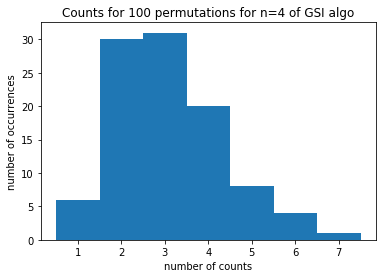

In [24]:
bins = range(1,9)
bins_2 = [x-0.5 for x in bins]
plt.hist(iterations_list, bins=bins_2)
plt.xlabel('number of counts')
plt.ylabel('number of occurrences')
plt.title('Counts for 100 permutations for n=4 of GSI algo')

Now we run the matching algorithm in 100 iterations for n = 40

In [25]:
# number of men or women 
n = 40

# run the 100 iterations
mean, maxi, mini, iterations_list = matching_stat(n)

# print the values of the average, maximum and minimum
print('The average number of iterations for n = 40 is {}'.format(mean))
print('The maximum number of iterations for n = 40 is {}'.format(maxi))
print('The minimum number of iterations for n = 40 is {}'.format(mini))

The average number of iterations for n = 40 is 56.05
The maximum number of iterations for n = 40 is 161.0
The minimum number of iterations for n = 40 is 11.0


Text(0.5, 1.0, 'Counts for 100 permutations for n=40 of GSI algo')

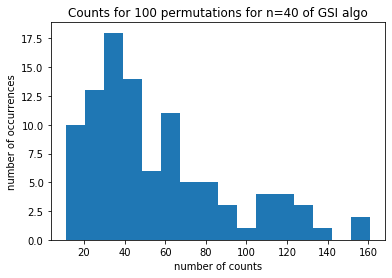

In [27]:
plt.hist(iterations_list, bins = 16)
plt.xlabel('number of counts')
plt.ylabel('number of occurrences')
plt.title('Counts for 100 permutations for n=40 of GSI algo')